# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
params = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={params}&q="
count_one = 0
set_one = 0

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

saved_lats = []
saved_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)




632

In [14]:
city_list = pd.DataFrame({"City":cities, "Approx. Latitude":saved_lats, "Approx. Longitude":saved_longs})
# city_list = pd.DataFrame({"City":cities})

#save to a csv (for reference - can compare estimated coordinates to actual coordinates if there is time, which cannot be done
#easily with citipy because the references only go one way -> approx. coordinates to city name, not city name to actual 
#coordinates)

city_list.head()

,City,Approx. Latitude,Approx. Longitude
0,saint george,34.638139,-53.614066
1,hun,29.789163,14.165376
2,lebu,-36.184328,-95.060480
3,grand gaube,-13.782073,66.427255
4,jamestown,-51.453514,-14.151137


In [15]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
#city = "korla"

# Build query URL

#query_url = url + "appid=" + weather_api_key + "&q=" + city

#query_url


In [16]:
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

In [17]:
#from pprint import pprint
#pprint(weather_json)

In [8]:
#base_url_current = "http://weather_api_key.openweathermap.org/data/2.5/weather"
#params = {"q":city_list["City"][0],"appid":weather_api_key}
#base_url_current

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# set lists for the dataframe
  
 
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

City not found. Skipping...
Processing Record 1 of Set 1 | hun
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | jamestown
City not found. Skipping...
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | galveston
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | tukrah
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | khvorostyanka
City not found. Skipping...
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | lazaro cardenas
Processing Record 

Processing Record 35 of Set 4 | nanakuli
City not found. Skipping...
Processing Record 36 of Set 4 | ahuimanu
Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | kingaroy
Processing Record 39 of Set 4 | yar-sale
Processing Record 40 of Set 4 | ponta delgada
Processing Record 41 of Set 4 | saint-louis
City not found. Skipping...
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | sahaswan
Processing Record 44 of Set 4 | kloulklubed
Processing Record 45 of Set 4 | niono
City not found. Skipping...
Processing Record 46 of Set 4 | ariquemes
Processing Record 47 of Set 4 | hue
Processing Record 48 of Set 4 | shiyan
Processing Record 49 of Set 4 | vila velha
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | basco
Processing Record 3 of Set 5 | jaumave
Processing Record 4 of Set 5 | hilo
Processing Record 5 of Set 5 | salinopolis
Processing Record 6 of Set 5 | makakilo city
Processing Record 7 of Set 5 | chokwe
Processing Record 8 of

Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | kairana
Processing Record 30 of Set 8 | lubao
Processing Record 31 of Set 8 | kem
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | aitape
Processing Record 34 of Set 8 | ust-nera
Processing Record 35 of Set 8 | bouna
Processing Record 36 of Set 8 | berdigestyakh
City not found. Skipping...
Processing Record 37 of Set 8 | nioro
Processing Record 38 of Set 8 | kosh-agach
Processing Record 39 of Set 8 | salina
Processing Record 40 of Set 8 | yumen
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | maragogi
Processing Record 43 of Set 8 | auki
Processing Record 44 of Set 8 | mezen
Processing Record 45 of Set 8 | blagoyevo
Processing Record 46 of Set 8 | nuevo progreso
Processing Record 47 of Set 8 | grootfontein
Processing Record 48 of Set 8 | trairi
Processing Record 49 of Set 8 | tocache
Processing Record 1 of Set 9 | santa cruz del sur
City not found. Skipping...
Processing R

Processing Record 15 of Set 12 | northam
Processing Record 16 of Set 12 | malaba
Processing Record 17 of Set 12 | duma
City not found. Skipping...
Processing Record 18 of Set 12 | kearney
Processing Record 19 of Set 12 | martapura
Processing Record 20 of Set 12 | sur
Processing Record 21 of Set 12 | shimoda
Processing Record 22 of Set 12 | carutapera
Processing Record 23 of Set 12 | ayan
City not found. Skipping...
Processing Record 24 of Set 12 | novopokrovka
Processing Record 25 of Set 12 | saldanha
------------------------------
Data Retrieval Complete
------------------------------


In [20]:
print(len(city_two))
print(len(cloudinesses))
print(len(dates))
print(len(humidities))
print(len(lats))
print(len(lngs))
print(len(max_temps))
print(len(wind_speeds))
print(len(countries))


564
564
564
564
564
564
564
564
564


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict =  {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hun,0,LY,1666665108,59,29.1268,15.9477,62.13,1.70
1,lebu,100,CL,1666665108,93,-37.6167,-73.6500,50.68,2.17
2,grand gaube,25,US,1666665108,43,38.8755,-109.5012,40.19,4.65
3,jamestown,0,US,1666665094,84,42.0970,-79.2353,62.24,3.44
4,qaanaaq,99,GL,1666665109,71,77.4840,-69.3632,16.05,8.19


In [22]:
# output data to csv
weather_df.to_csv(output_data_file)

In [23]:
weather_df['Humidity'].count()



564

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
weather_df.loc[weather_df['Humidity'] < 101]
 
weather_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [25]:
checkit = weather_df["Humidity"].describe(include = 'all')
checkit

count    564.000000
mean      73.423759
std       19.302662
min       16.000000
25%       61.000000
50%       78.000000
75%       88.250000
max      100.000000
Name: Humidity, dtype: float64

In [26]:
#  Get the indices of cities that have humidity over 100%.
# not necessary as can see max value is 100

indices = list(np.where(weather_df["Humidity"]>100)[0])


In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_df[weather_df["Humidity"] < 101]
clean_city_data_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [28]:
north_df = weather_df.loc[pd.to_numeric(clean_city_data_df["Lat"]).astype(float) > 0, :]

south_df = weather_df.loc[pd.to_numeric(clean_city_data_df["Lat"]).astype(float) < 0, :]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

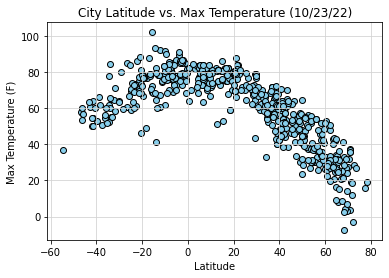

In [29]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot1.png")
plt.show()

## Latitude vs. Humidity Plot

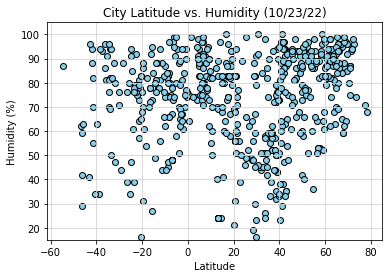

In [30]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot2.png")
plt.show()

## Latitude vs. Cloudiness Plot

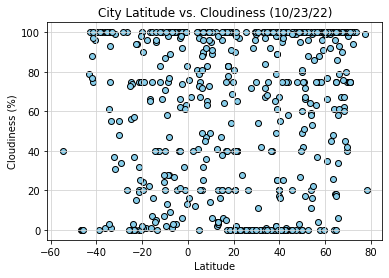

In [31]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot3.png")
plt.show()

## Latitude vs. Wind Speed Plot

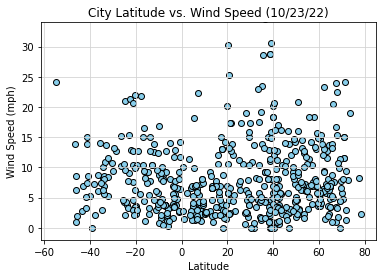

In [32]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot4.png")
plt.show()

## Linear Regression

Regression line equation is: y = -0.91x + 90.5
The r-squared is: 0.7919164615443975


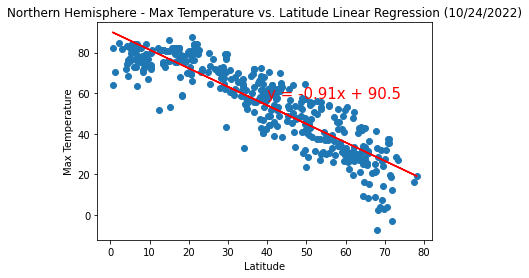

In [33]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature") 
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression (10/24/2022)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("charts/linearreg1_North.png")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.59x + 83.11
The r-squared is: 0.46043564709913015


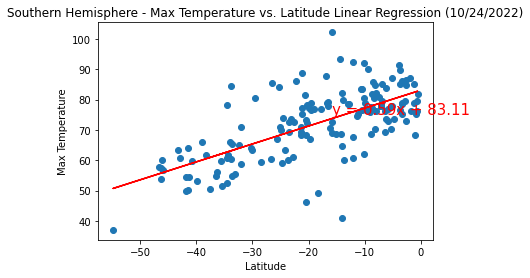

In [34]:
## Latitude vs. Temperature Plot
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature") 
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression (10/24/2022)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("charts/linearreg1_South.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.21x + 65.84
The r-squared is: 0.04356776881465063


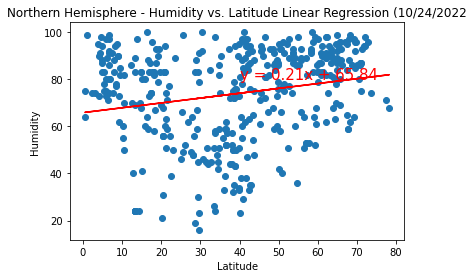

In [35]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression (10/24/2022")
plt.savefig("charts/linearreg2_North.png")
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 74.1
The r-squared is: 0.0049967084909060995


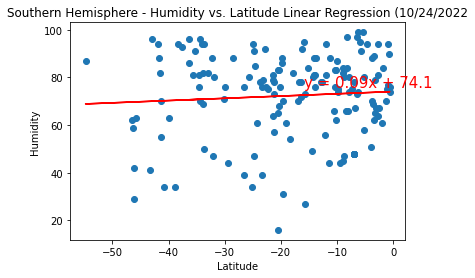

In [36]:
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (10/24/2022")
plt.savefig("charts/linearreg2_South.png")
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 45.93
The r-squared is: 0.043042050368342785


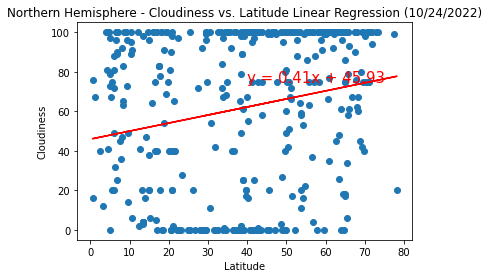

In [37]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (10/24/2022)")
plt.savefig("charts/linearreg3_North.png")
print(f"The r-squared is: {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 63.85
The r-squared is: 0.009003492825842507


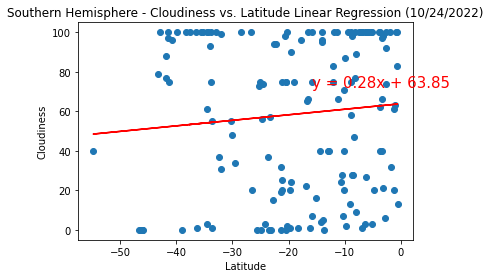

In [38]:
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (10/24/2022)")
plt.savefig("charts/linearreg3_South.png")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 6.14
The r-squared is: 0.020201419250544233


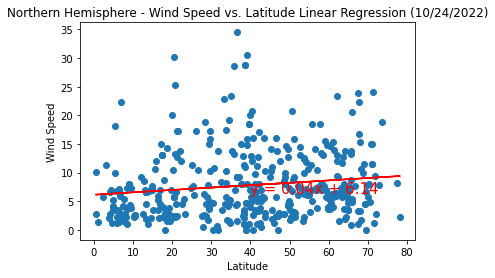

In [39]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (10/24/2022)")
plt.savefig("charts/linearreg4_North.png")
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 6.23
The r-squared is: 0.036574085868667505


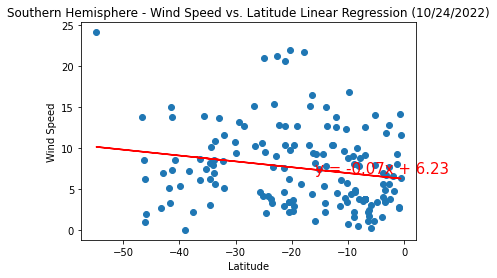

In [40]:
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (10/24/2022)")
plt.savefig("charts/linearreg4_South.png")
print(f"The r-squared is: {rvalue**2}")

plt.show()